In [ ]:
!pip install librosa

In [2]:
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np

In [98]:
audio_fpath = 'data/'
x, sr = librosa.load(audio_fpath+'Vein drive cut2.wav', sr=None)
duration = x.shape[0]/sr
print(type(x), type(sr))
print(x.shape, sr)
print("Duration: "+str(duration))

<class 'numpy.ndarray'> <class 'int'>
(106496,) 48000
Duration: 2.2186666666666666


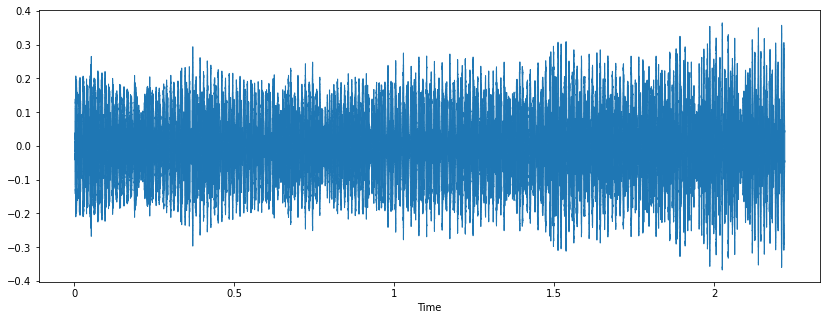

In [99]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

In [104]:
ipd.Audio(x, rate=sr)

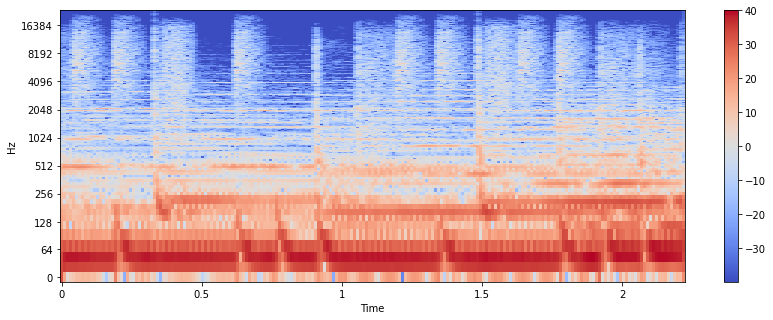

In [150]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

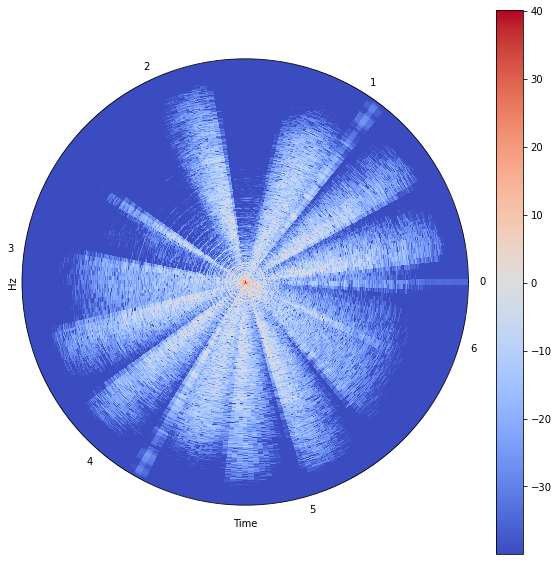

In [151]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': 'polar'})
s = librosa.display.specshow(Xdb, ax=ax, sr=sr, x_coords=np.linspace(0, np.pi*2, Xdb.shape[1]), x_axis='time', y_axis='hz')
ax.set_rticks([])
fig.colorbar(s, ax=ax)

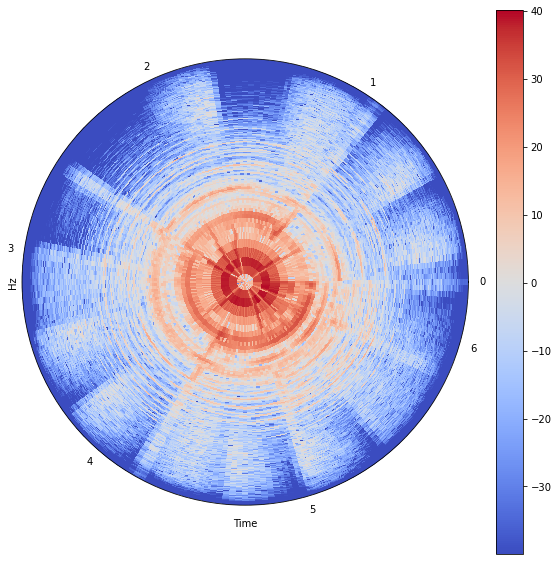

In [152]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': 'polar'})
s = librosa.display.specshow(Xdb, ax=ax, sr=sr, x_coords=np.linspace(0, np.pi*2, Xdb.shape[1]), x_axis='time', y_axis='log')
ax.set_rticks([])
fig.colorbar(s, ax=ax)

## Two plots (librosa, matplotlib)

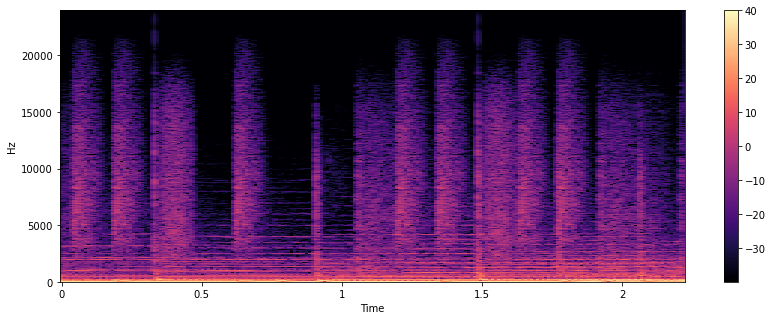

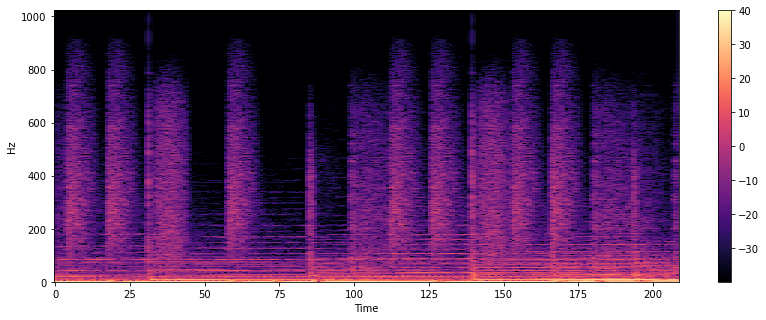

In [160]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar()

plt.figure(figsize=(14,5))
plt.xlabel("Time")
plt.ylabel("Hz")
im = plt.imshow(Xdb, aspect='auto', origin='lower', cmap='magma', interpolation='nearest')
plt.colorbar();

## Invertible transform

In [154]:
# x = ...

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(np.(X))

X2 = librosa.db_to_amplitude(Xdb)
x2 = librosa.istft(X2)

SyntaxError: invalid syntax (1487454035.py, line 4)

In [155]:
ipd.Audio(x2, rate=sr)

Here, we keep `X_real_sgn`, `X_imag_sgn` for a later use

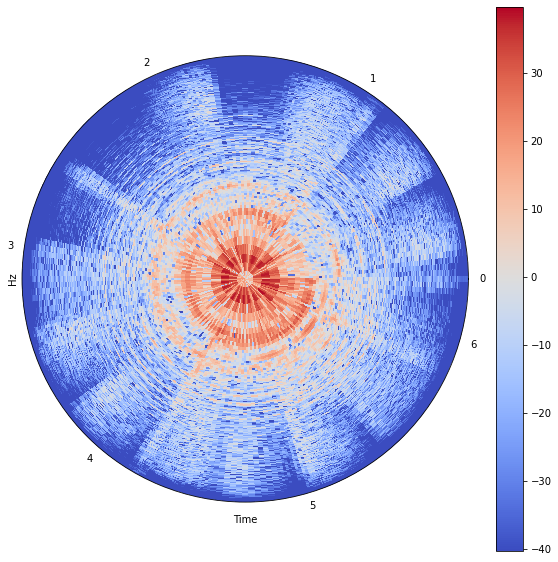

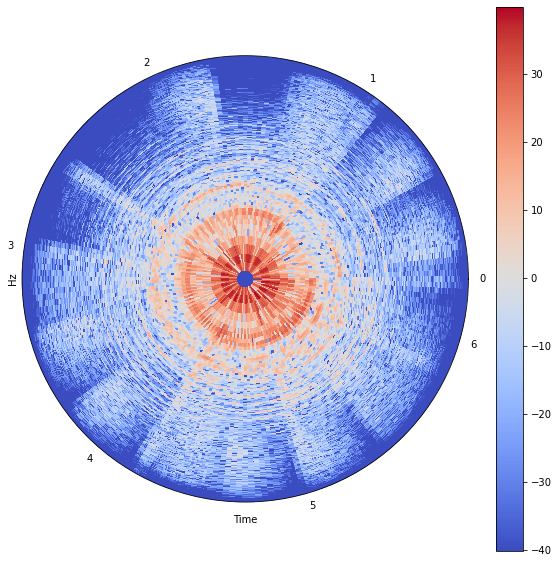

In [156]:
X = librosa.stft(x)
X_real_sgn = np.sign(np.real(X))
X_imag_sgn = np.sign(np.imag(X))

fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': 'polar'})
s = librosa.display.specshow(librosa.amplitude_to_db(np.abs(np.real(X))), ax=ax, sr=sr, x_coords=np.linspace(0, np.pi*2, Xdb.shape[1]), x_axis='time', y_axis='log')
ax.set_rticks([])
fig.colorbar(s, ax=ax)

fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': 'polar'})
s = librosa.display.specshow(librosa.amplitude_to_db(np.abs(np.imag(X))), ax=ax, sr=sr, x_coords=np.linspace(0, np.pi*2, Xdb.shape[1]), x_axis='time', y_axis='log')
ax.set_rticks([])
fig.colorbar(s, ax=ax)

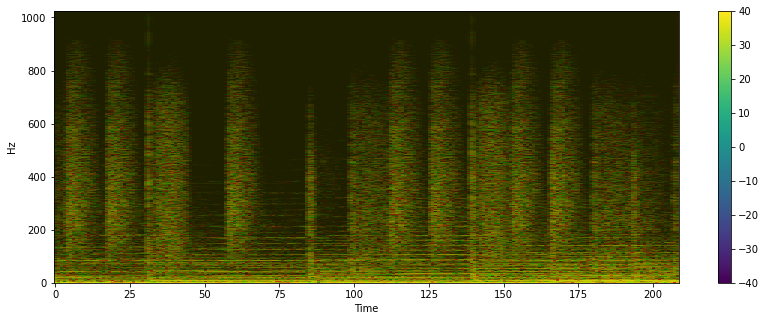

In [215]:
from scipy.special import expit, logit

scale_factor = 20
def part_to_channel(part): # real or imaginary part; convert to an RGB channel with floats within [0, 1]
    #return np.interp(np.tanh(librosa.amplitude_to_db(np.abs(part)).astype(np.float64)/scale_factor), [-1,1], [0,1])
    return expit(librosa.amplitude_to_db(np.abs(part)).astype(np.float64)/scale_factor)
def channel_to_part(channel):
    return librosa.db_to_amplitude(logit(channel)*scale_factor)
data = np.array([
    part_to_channel(np.real(X)),
    part_to_channel(np.imag(X)),
    #np.abs(np.real(X))**2,
    #np.abs(np.imag(X))**2,
    np.zeros(np.real(X).shape)
]).transpose(1,2,0)

#from scipy.interpolate import interp1d
#m = interp1d([-40,40],[0,1])

plt.figure(figsize=(14,5))
plt.xlabel("Time")
plt.ylabel("Hz")
im = plt.imshow(data, aspect='auto', interpolation='nearest', origin='lower', vmin=-40, vmax=40)
plt.colorbar();

**Now, convert back to Audio**

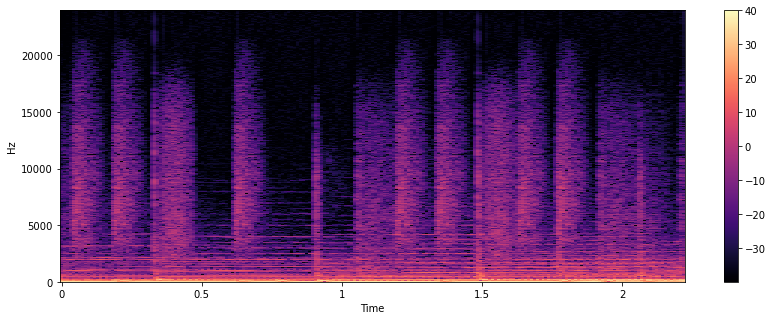

In [216]:
X2_real = channel_to_part(data[:,:,0]) * X_real_sgn
X2_imag = channel_to_part(data[:,:,1]) * X_imag_sgn
X2 = X2_real + 1j * X2_imag

x2 = librosa.istft(X2)
display(ipd.Audio(x2, rate=sr))

plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(x2))), sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar()

**Blur the image and convert back**

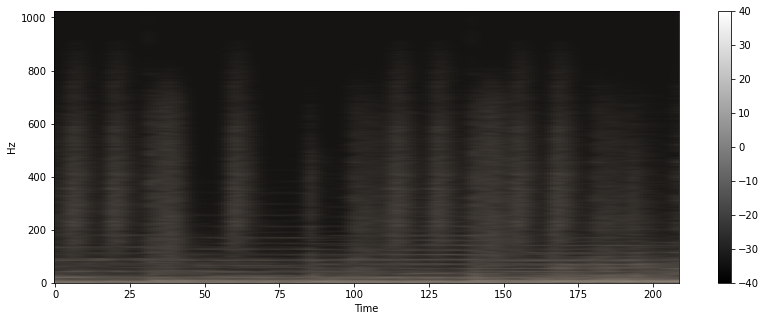

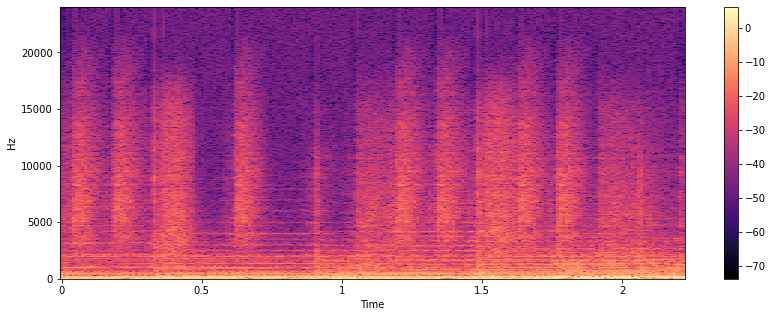

In [237]:
from scipy.ndimage.filters import gaussian_filter

data2 = gaussian_filter(data, sigma=2)

plt.figure(figsize=(14,5))
plt.xlabel("Time")
plt.ylabel("Hz")
im = plt.imshow(data2, aspect='auto', interpolation='nearest', origin='lower', vmin=-40, vmax=40)
plt.colorbar();

# convert to audio
X2_real = channel_to_part(data2[:,:,0]) * X_real_sgn
X2_imag = channel_to_part(data2[:,:,1]) * X_imag_sgn
X2 = X2_real + 1j * X2_imag

x2 = librosa.istft(X2)
display(ipd.Audio(x2, rate=sr))

plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(x2))), sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar()